<img src="https://portal.psut.edu.jo/Images/LogoVcampus.png" alt="Image" width="300" height="100">

## Group A Project

## Web and Social Network Analysis - Dr. Omar Al-Qawasmeh
## Second Semester 2023- 2024  
------------------


In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install pyrdf2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 874.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 749.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 39.5 MB/s eta 0:00:00
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp310-cp310-linux_x86_64.wh

In [ ]:
import os
import time
#os.chdir(os.path.dirname(INSERT_PATH_HERE))
import pandas as pd
import rdflib

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker
from pyrdf2vec.walkers import AnonymousWalker
from pyrdf2vec.samplers import PageRankSampler
from pyrdf2vec.walkers import WalkletWalker
from pyrdf2vec.walkers import NGramWalker

import matplotlib.pyplot as plt

## Loading Data

In [ ]:
"""
Script for Loading Knowledge Graph and Ground Truth Data

Usage:
- Ensure that 'artists_graph.nt' and 'bands_labels.csv' files are available in the current directory.
- The script loads the Knowledge Graph (KG) from 'artists_graph.nt'.
- It compares the entities in the ground truth data ('bands_labels.csv') with the entities in the KG.
- Prints entities present in ground truth but not in the KG.

"""


# Record the start time for measuring execution time
start_time = time.process_time()

# Load Knowledge Graph (KG) from 'artists_graph.nt'
kg = KG('/content/drive/MyDrive/SampleKG3_CorrectedTBOX.ttl')

# Load ground truth data from 'bands_labels.csv'
df = pd.read_csv('/content/drive/MyDrive/groundTruthLoan.csv', header=0, names=["Applicant", "ClassifiedAs"])
dfX = df[['Applicant']]
dfY = df[['ClassifiedAs']]

In [ ]:
#to sample the data
# Use RDFLib to load the graph from the KG
g = rdflib.Graph()
g.parse("/content/drive/MyDrive/SampleKG3_CorrectedTBOX.ttl", format="ttl")

# Show a sample of the data
counter = 0
for subj, pred, obj in g:
    if counter >= 60:
        break
    print(subj, pred, obj)
    counter += 1
    # You can limit the number of triples printed or add other conditions as needed


In [ ]:
df.head()

Applicant  \
0  http://example.org/ontology#Applicant_100238   
1  http://example.org/ontology#Applicant_100456   
2  http://example.org/ontology#Applicant_100535   
3  http://example.org/ontology#Applicant_100570   
4  http://example.org/ontology#Applicant_100583   

                             ClassifiedAs  
0  http://example.org/ontology#NotDefault  
1  http://example.org/ontology#NotDefault  
2  http://example.org/ontology#NotDefault  
3  http://example.org/ontology#NotDefault  
4  http://example.org/ontology#NotDefault

In [ ]:
# Extract unique entities from ground truth data
entities = list(dict.fromkeys(df['Applicant'].to_list()))

# Extract entity names from the KG
kg_entities = kg._entities
kg_entity_names = [kge.name for kge in kg_entities]

In [ ]:
  # Compare entities from ground truth with entities in the KG
for e in entities:
    found = e in kg_entity_names
    if not found:
        print(f"Entity '{e}' not found in the KG.")


In [ ]:
# Record the end time and calculate elapsed time
end_time = time.process_time()
elapsed_time = end_time - start_time

# Print execution time and the total number o f entities
print(f"Graph loaded in {elapsed_time} seconds")
print(f"Total number of entities: {len(entities)}")

Graph loaded in 27.764340785 seconds
Total number of entities: 7988


In [ ]:
import pandas as pd

# Specify the path to the CSV file
file_path = "/content/drive/MyDrive/SampleKG3_embeddings.csv"

# Load the CSV file into a pandas DataFrame
embeddings = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(embeddings.head())

          0         1         2         3         4         5         6  \
0  0.060179 -0.175731 -0.143610 -0.049935  0.065994 -0.055698 -0.020557   
1  0.052905 -0.156746 -0.100816 -0.054949  0.098002 -0.057823 -0.062212   
2  0.001204 -0.040753 -0.052816  0.000832  0.127760  0.005323  0.056860   
3  0.004762 -0.077062 -0.065792 -0.055117  0.123189 -0.037755  0.005479   
4  0.009855 -0.115852 -0.090444  0.008310  0.112872  0.036361 -0.034429   

          7         8         9  ...       190       191       192       193  \
0  0.247745 -0.110708 -0.049814  ...  0.101899  0.016628 -0.060008  0.013830   
1  0.223562 -0.052274 -0.073151  ...  0.058877  0.033709 -0.107540 -0.010493   
2  0.195995 -0.127361 -0.000787  ...  0.085495  0.060231 -0.086854 -0.030018   
3  0.213291 -0.059106  0.025288  ...  0.076692  0.030764 -0.093555 -0.031664   
4  0.221944 -0.107025  0.007756  ...  0.068177  0.078187  0.000413  0.028267   

        194       195       196       197       198       199  
0 -0

## Generating Embeddings

In [ ]:
"""
Random Walking Configuration

Description:
- In this script, a random walker is configured with specific parameters for generating random walks in a graph.

Usage:
- The random walker is designed to traverse the graph, creating random walks for each entity.
- The depth parameter specifies the maximum length of each walk, indicating how many nodes to visit in a single walk.
- The max_walks parameter specifies the maximum number of walks to generate for each entity.

"""

from pyrdf2vec.walkers import RandomWalker

walkers = [RandomWalker(4, 500)]

In [ ]:
# Configuration: Walkers for RDF2VecTransformer and Word2Vec embedder
transformer = RDF2VecTransformer(walkers=walkers, embedder=Word2Vec(sg=1, vector_size=200, hs=1, window=5, min_count=0))

# Record the start time for measuring execution time
st = time.process_time()


# Fit and transform the KG into embeddings
embeddings,_ = transformer.fit_transform(kg, entities)

# Record the end time and calculate elapsed time
et = time.process_time()
duration = str(et-st)
print("embeddings computed in " + duration + " seconds")

embeddings computed in 27.306340253000002 seconds


In [ ]:
print(len(embeddings))

7988


In [ ]:
embeddings

[array([ 0.08396805, -0.12317191, -0.10258471, -0.0694977 ,  0.12423088,
        -0.0975463 , -0.04940204,  0.1502103 , -0.01786783,  0.04100031,
         0.10493959,  0.07878235, -0.03117554,  0.02122307, -0.02384096,
         0.00264608, -0.02097104, -0.11128236, -0.0933295 , -0.21346863,
         0.13149482, -0.07189358,  0.01818989, -0.01170873, -0.12244061,
        -0.11138132,  0.01919609,  0.00190835, -0.01307125, -0.00787642,
         0.2321627 , -0.0249943 ,  0.21159665, -0.05909806,  0.00370898,
        -0.0783984 ,  0.01020605,  0.11781629,  0.08133239, -0.02329455,
         0.12368163, -0.00382657, -0.06773595,  0.03932952, -0.09417373,
        -0.10996275,  0.07151091,  0.0128532 ,  0.05120189,  0.14760427,
         0.04903822, -0.09851108,  0.02572968,  0.01880121,  0.10196881,
         0.07806368,  0.11787086, -0.03328316, -0.12434334, -0.01589908,
        -0.04625016, -0.02207193,  0.02377241, -0.06806011, -0.17768289,
         0.1216189 , -0.02017396, -0.01261767, -0.2

In [ ]:
import pickle

# Save embeddings
with open('embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

In [ ]:
import pickle
# Load embeddings
with open('embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

Embeddings completed

## Machine Learning

### Neural Network

In [ ]:
'''

Neural Network Classification with 10-Fold Cross-Validation

Description:
- This script performs a 10-fold cross-validation to evaluate the performance of a Multi-Layer Perceptron (MLP) classifier on a dataset represented by embeddings.

Usage:
- The embeddings are assumed to be a 2D array where each row corresponds to an instance (entity) in the dataset, and each column represents features in the embedding vector.
- The MLP classifier is trained and evaluated using 10-fold cross-validation.

Steps:
1. Convert the embeddings to a DataFrame where each row represents an instance and each column represents a feature.
2. Initialize an MLP classifier with a maximum of 10,000 iterations (epochs).
3. Perform 10-fold cross-validation using the MLP classifier and the dataset.
4. Calculate the mean accuracy across the 10 folds.
'''

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

import numpy as np

dfX = pd.DataFrame(list(map(np.ravel, embeddings)))

clf = MLPClassifier(max_iter=10000)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary with the metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

# Perform 10-fold cross-validation with multiple metrics
scores = cross_validate(clf, dfX, dfY.values.ravel(), cv=10, scoring=scoring)

# Print the metrics
for metric_name in scores.keys():
    average_score = np.mean(scores[metric_name])
    print(f'{metric_name}: {average_score}')

fit_time: 124.19778318405152
score_time: 0.07154948711395263
test_accuracy: 0.9285193584712721
test_precision: 0.9224660658160962
test_recall: 0.9285193584712721
test_f1_score: 0.9233840470155481


## XAI using GraphLime

In [ ]:
!pip install skope-rules

In [ ]:
import pickle
# Load embeddings
with open('embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

In [ ]:
import time
import pandas as pd
import numpy as np
from pyrdf2vec.graphs import KG
from pyrdf2vec.rdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.walkers import RandomWalker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Record the start time for measuring execution time
start_time = time.process_time()

# Load Knowledge Graph (KG)
# Load Knowledge Graph (KG) from 'artists_graph.nt'
kg = KG('/content/drive/MyDrive/SampleKG3_CorrectedTBOX.ttl')

# Load ground truth data from 'bands_labels.csv'
df = pd.read_csv('/content/drive/MyDrive/groundTruthLoan.csv', header=0, names=["Applicant", "ClassifiedAs"])
dfX = df[['Applicant']]
dfY = df[['ClassifiedAs']]# Extract unique entities from ground truth data
entities = list(dict.fromkeys(df['Applicant'].to_list()))



In [ ]:
# Neural network classifier
clf = MLPClassifier(max_iter=10000)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform 10-fold cross-validation with multiple metrics
scores = cross_validate(clf, pd.DataFrame(list(map(np.ravel, embeddings))), dfY.values.ravel(), cv=10, scoring=scoring)

# Print the metrics
for metric_name in scores.keys():
    average_score = np.mean(scores[metric_name])
    print(f'{metric_name}: {average_score}')

fit_time: 115.91900463104248
score_time: 0.05793755054473877
test_accuracy: 0.9293965514537282
test_precision: 0.9243651284763725
test_recall: 0.9293965514537282
test_f1_score: 0.924417470336895


In [ ]:
import time
import pandas as pd
import numpy as np
from pyrdf2vec.graphs import KG
from pyrdf2vec.rdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.walkers import RandomWalker
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score




# Train the neural network classifier
clf.fit(embeddings, dfY.values.ravel())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MLPClassifier(max_iter=10000)

In [ ]:
rule_extractor = DecisionTreeClassifier(max_depth=3)  # Specify the maximum depth of the rules
rule_extractor.fit(embeddings, dfY.values.ravel())
embeddingsArr = np.array(embeddings)  # Convert list of arrays to a single 2D NumPy array

# Export rules as text
feature_names = [f'feature_{i}' for i in range(embeddingsArr.shape[1])]
rules_text = export_text(rule_extractor, feature_names=feature_names)
print(f"Extracted Rules:\n{rules_text}")

# Function to explain predictions
def explain_prediction(entity):
    # Get the embedding for the entity
    entity_idx = entities.index(entity)
    embedding = embeddingsArr[entity_idx].reshape(1, -1)

    # Predict the class
    prediction = clf.predict(embedding)[0]

    # Retrieve rules and translate to FOL
    applicable_rules = export_text(rule_extractor, feature_names=feature_names)

    # Create explanation
    explanation = f"Entity '{entity}' is classified as '{prediction}' because:\n"
    explanation += applicable_rules

    return explanation

# Test the explanation function on a sample entity
sample_entity = entities[0]
explanation = explain_prediction(sample_entity)
print(f"Explanation for {sample_entity}:\n{explanation}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracted Rules:
|--- feature_62 <= 0.02
|   |--- feature_149 <= 0.06
|   |   |--- feature_161 <= 0.03
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |   |--- feature_161 >  0.03
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |--- feature_149 >  0.06
|   |   |--- feature_62 <= -0.02
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |   |--- feature_62 >  -0.02
|   |   |   |--- class: http://example.org/ontology#NotDefault
|--- feature_62 >  0.02
|   |--- feature_18 <= -0.14
|   |   |--- feature_149 <= 0.03
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |   |--- feature_149 >  0.03
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |--- feature_18 >  -0.14
|   |   |--- feature_126 <= -0.11
|   |   |   |--- class: http://example.org/ontology#NotDefault
|   |   |--- feature_126 >  -0.11
|   |   |   |--- class: http://example.org/ontology#NotDefault

Explanation for http://example.org/ontology#Appl

## Decision Tree + Vizualization

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

# beautify feature names for decision tree for visualization
features=dfX.columns

# learn and plot tree
# Create a DecisionTreeClassifier with a specified minimum number of samples per leaf
clf = tree.DecisionTreeClassifier(min_samples_leaf=50)

# Train the decision tree classifier using input features (dfX) and target labels (dfY)
clf = clf.fit(dfX, dfY)


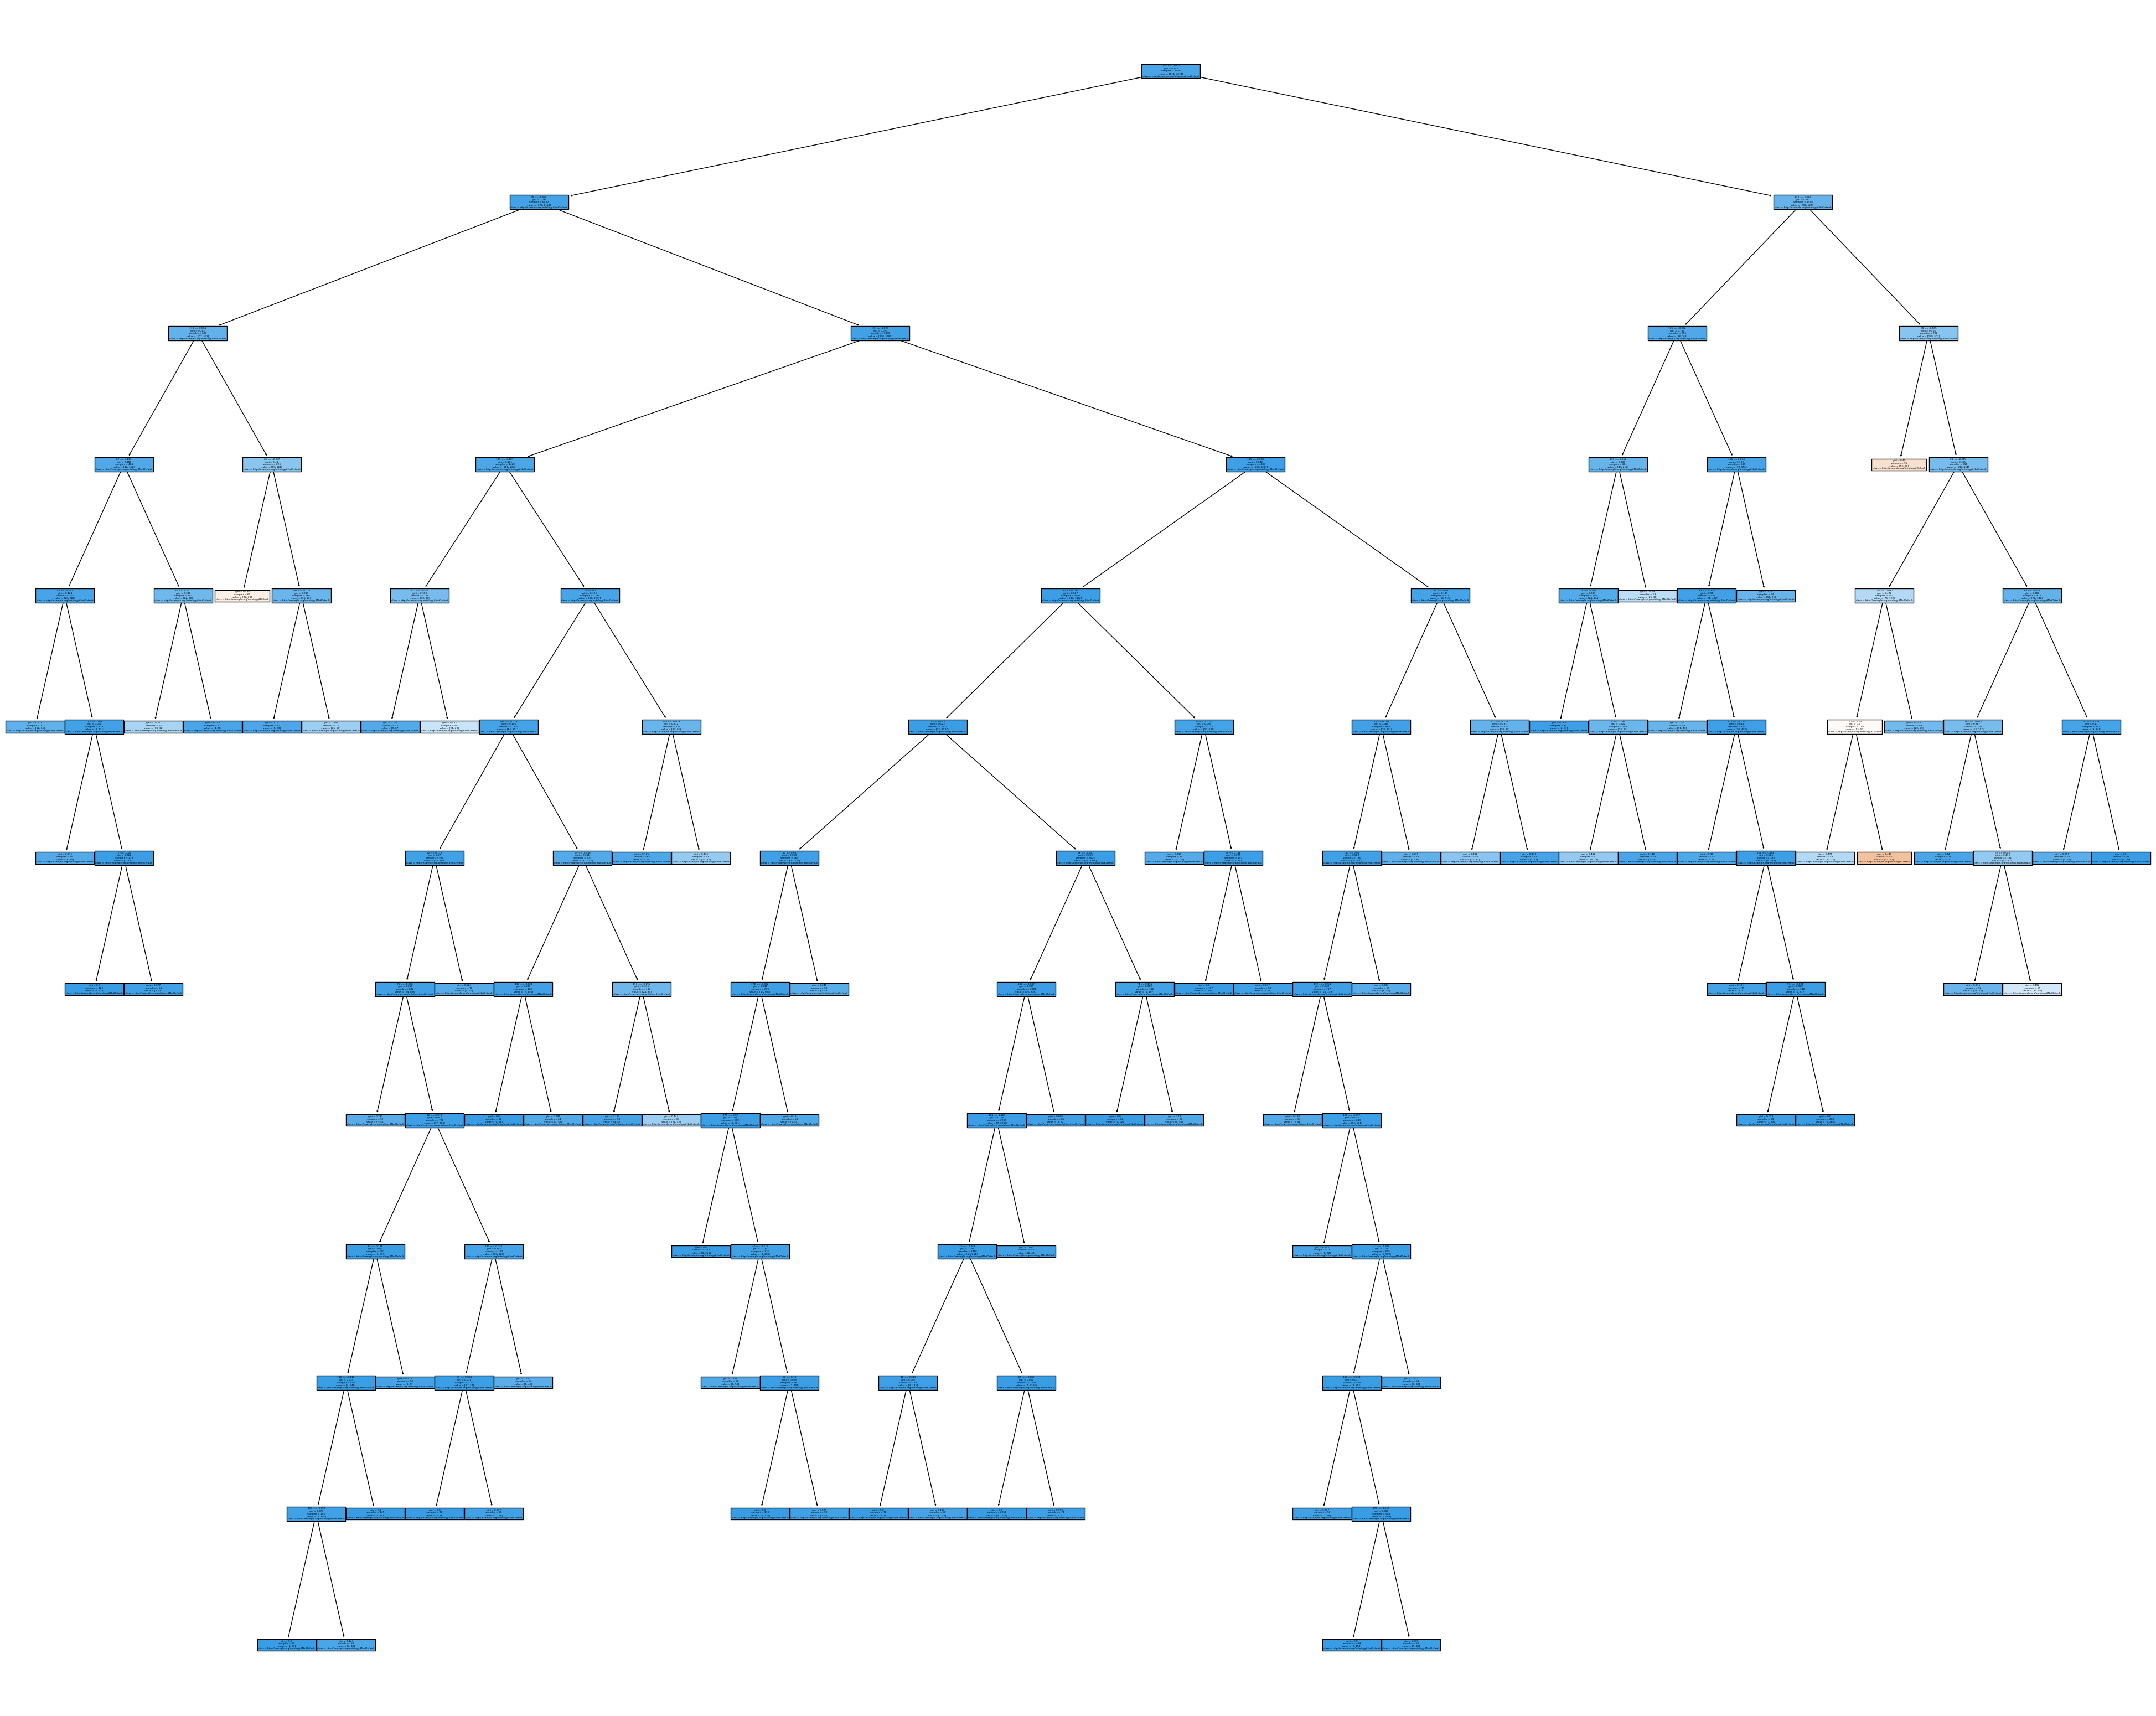

In [ ]:
#Plot DT
# Set up a figure for plotting the decision tree with specified dimensions
class_names = clf.classes_
fig, ax = plt.subplots(figsize=(50, 40))  # Increase the figure size

# Plot the decision tree with the following configurations:
# - feature_names: feature names for better visualization
# - class_names: unique classes present in the target labels
# - filled: whether to fill the decision tree nodes with color
tree.plot_tree(clf,
               feature_names=features,
               class_names=class_names, #fix this as current classes are flipped/wrong
               filled=True,
               ax=ax)

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Split the data into a training set and a test set
dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(dfX, dfY, test_size=0.2, random_state=42)

# Train the model on the training set
clf = clf.fit(dfX_train, dfY_train)

# Make predictions on the test set
dfY_pred = clf.predict(dfX_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(dfY_test, dfY_pred)
f1 = f1_score(dfY_test, dfY_pred, average='weighted')
precision = precision_score(dfY_test, dfY_pred, average='weighted')
recall = recall_score(dfY_test, dfY_pred, average='weighted')
conf_matrix = confusion_matrix(dfY_test, dfY_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.9198998748435544
F1 Score: 0.9063820438803223
Precision: 0.8963684975384326
Recall: 0.9198998748435544
Confusion Matrix:
 [[  12   91]
 [  37 1458]]


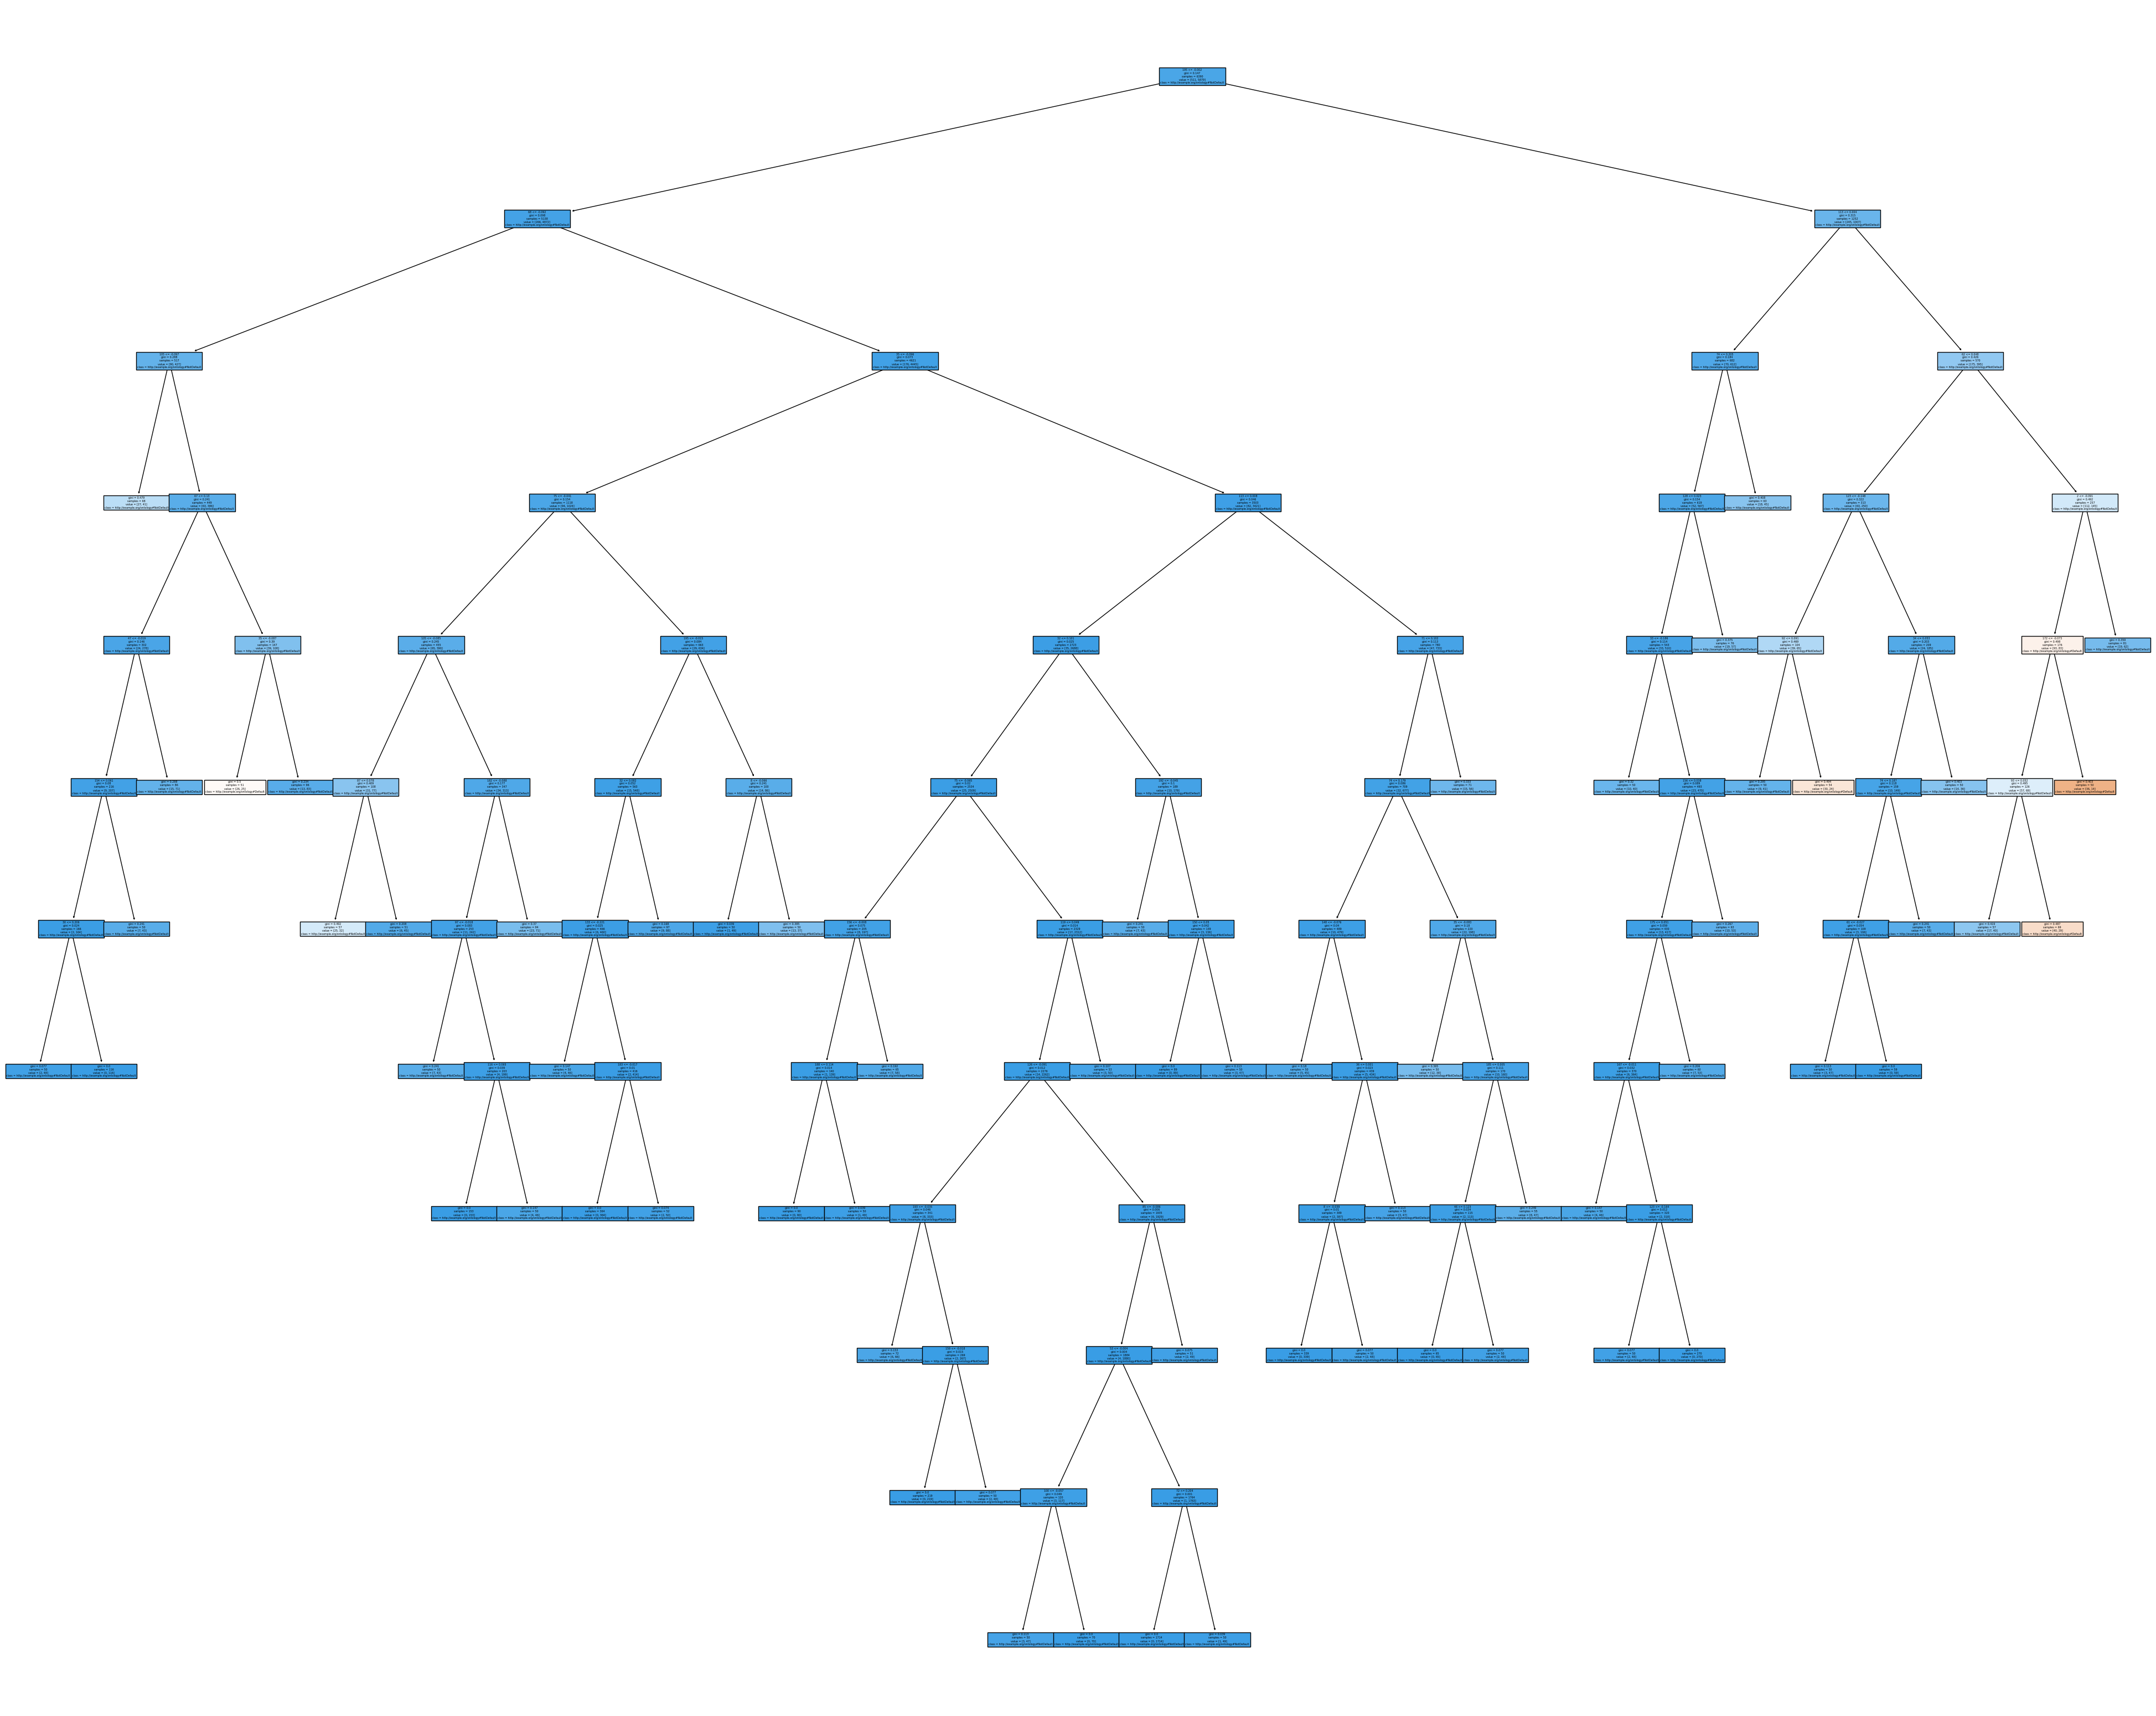

In [ ]:
#Plot DT
# Set up a figure for plotting the decision tree with specified dimensions
class_names = clf.classes_
fig, ax = plt.subplots(figsize=(50, 40))  # Increase the figure size

# Plot the decision tree with the following configurations:
# - feature_names: feature names for better visualization
# - class_names: unique classes present in the target labels
# - filled: whether to fill the decision tree nodes with color
tree.plot_tree(clf,
               feature_names=features,
               class_names=class_names, #fix this as current classes are flipped/wrong
               filled=True,
               ax=ax)

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

In [ ]:

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

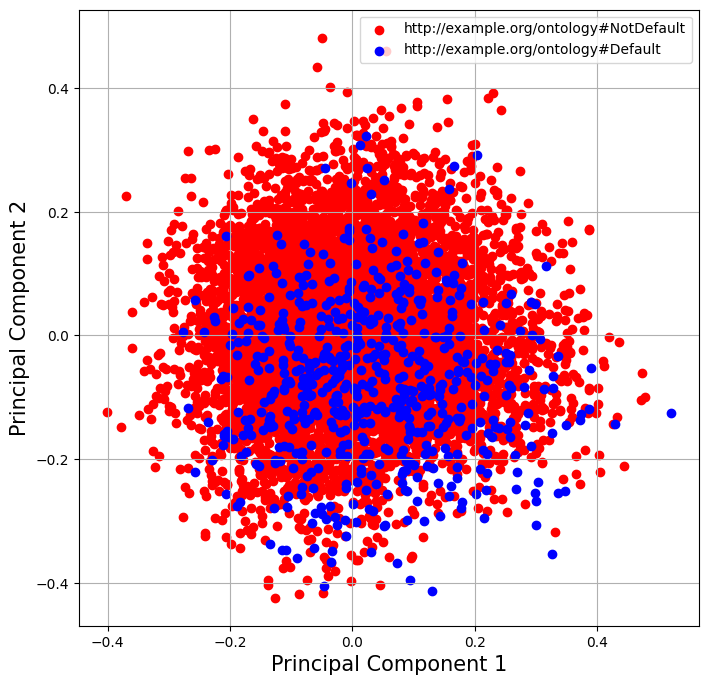

In [ ]:
from sklearn.decomposition import PCA


# Create a PCA (Principal Component Analysis) object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model and transform the input features (dfX) to obtain principal components
pca_result = pca.fit_transform(dfX)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])


# Concatenate the principal components with the target labels (dfY) into a single DataFrame
finalDf = pd.concat([principalDf, dfY], axis = 1)

# Set up a figure for plotting with specified dimensions
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

# Set labels for the x and y axes
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)


# Define target genres and corresponding colors for plotting
targets = ['http://example.org/ontology#NotDefault','http://example.org/ontology#Default']
colors = ['r', 'b']


# Scatter plot the principal components with different colors for each genre
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ClassifiedAs'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

# Testing other walks

## Generating Embeddings from Ananomus walks

In [ ]:
"""
Random Walking Configuration

Description:
- In this script, a random walker is configured with specific parameters for generating random walks in a graph.

Usage:
- The random walker is designed to traverse the graph, creating random walks for each entity.
- The depth parameter specifies the maximum length of each walk, indicating how many nodes to visit in a single walk.
- The max_walks parameter specifies the maximum number of walks to generate for each entity.


depth: This is the maximum depth of the walks. It determines how far the walker will go from the starting node. A larger depth means the walker will explore more distant nodes, potentially capturing more complex relationships, but it also increases the computational cost and can lead to more sparse feature vectors. The optimal depth can depend on the specific structure and complexity of your RDF graph.

walks_per_entity: This is the number of walks to be performed per entity. More walks can capture more diverse information, but again at the cost of increased computational time. If your graph is very large or complex, you might need more walks to adequately capture its structure.

"""

from pyrdf2vec.walkers import AnonymousWalker

walkers = [AnonymousWalker(6, 20)]

In [ ]:
"""
sg: This parameter defines the training algorithm. If sg=1, it uses the Skip-Gram algorithm. If sg=0, it uses the Continuous Bag of Words (CBOW) algorithm. Skip-Gram tends to work better on larger datasets, while CBOW is faster and performs well on smaller datasets.

vector_size: This parameter defines the dimensionality of the Word2Vec vectors. A larger vector_size means that the vector can capture more information, but it also means that the model will be more complex and require more data to train effectively.

hs: If hs=1, hierarchical softmax will be used for model training. If hs=0 (and negative is non-zero), negative sampling will be used.

window: This parameter defines the maximum distance between the current and predicted word within a sentence. In other words, it's the window of context words you're considering around your target word.

min_count: This parameter defines the minimum frequency of words to be considered. Words that appear less than min_count times are ignored.
"""
vectorSize=int(len(entities)/10)
# Configuration: Walkers for RDF2VecTransformer and Word2Vec embedder
transformer = RDF2VecTransformer(walkers=walkers, embedder=Word2Vec(sg=0, vector_size=vectorSize, hs=0, window=20, min_count=0))

# Record the start time for measuring execution time
st = time.process_time()


# Fit and transform the KG into embeddings
AnonEmbeddings,_ = transformer.fit_transform(kg, entities)

# Record the end time and calculate elapsed time
et = time.process_time()
duration = str(et-st)
print("embeddings computed in " + duration + " seconds")

embeddings computed in 8.049900302999994 seconds


In [ ]:
len(AnonEmbeddings)

7988

In [ ]:
import pandas as pd

# Convert the list to a DataFrame
embeds_df = pd.DataFrame(AnonEmbeddings)

# Save the DataFrame as a CSV file
embeds_df.to_csv('/content/drive/MyDrive/SampleKG3_AnonEmbeddings.csv', index=False)

## Machine Learning

### Neural Network

In [ ]:
'''

Neural Network Classification with 10-Fold Cross-Validation

Description:
- This script performs a 10-fold cross-validation to evaluate the performance of a Multi-Layer Perceptron (MLP) classifier on a dataset represented by embeddings.

Usage:
- The embeddings are assumed to be a 2D array where each row corresponds to an instance (entity) in the dataset, and each column represents features in the embedding vector.
- The MLP classifier is trained and evaluated using 10-fold cross-validation.

Steps:
1. Convert the embeddings to a DataFrame where each row represents an instance and each column represents a feature.
2. Initialize an MLP classifier with a maximum of 10,000 iterations (epochs).
3. Perform 10-fold cross-validation using the MLP classifier and the dataset.
4. Calculate the mean accuracy across the 10 folds.
'''

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

import numpy as np

dfX = pd.DataFrame(list(map(np.ravel, AnonEmbeddings)))

clf = MLPClassifier(max_iter=10000)



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary with the metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

# Perform 10-fold cross-validation with multiple metrics
scores = cross_validate(clf, dfX, dfY.values.ravel(), cv=10, scoring=scoring)

# Print the metrics
for metric_name in scores.keys():
    average_score = np.mean(scores[metric_name])
    print(f'{metric_name}: {average_score}')

fit_time: 1158.4687985897065
score_time: 0.41139819622039797
test_accuracy: 0.9131204105382353
test_precision: 0.8580531446003887
test_recall: 0.9131204105382353
test_f1_score: 0.8828647540465606


In [ ]:
fit_time: 119.49711811542511
score_time: 0.053544926643371585
test_accuracy: 0.9302718623843715
test_precision: 0.9253075346077415
test_recall: 0.9302718623843715
test_f1_score: 0.9256746043672794


### Decision Tree + Vizualization

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

# beautify feature names for decision tree for visualization
features=dfX.columns

# learn and plot tree
# Create a DecisionTreeClassifier with a specified minimum number of samples per leaf
clf = tree.DecisionTreeClassifier(min_samples_leaf=50)

# Train the decision tree classifier using input features (dfX) and target labels (dfY)
clf = clf.fit(dfX, dfY)


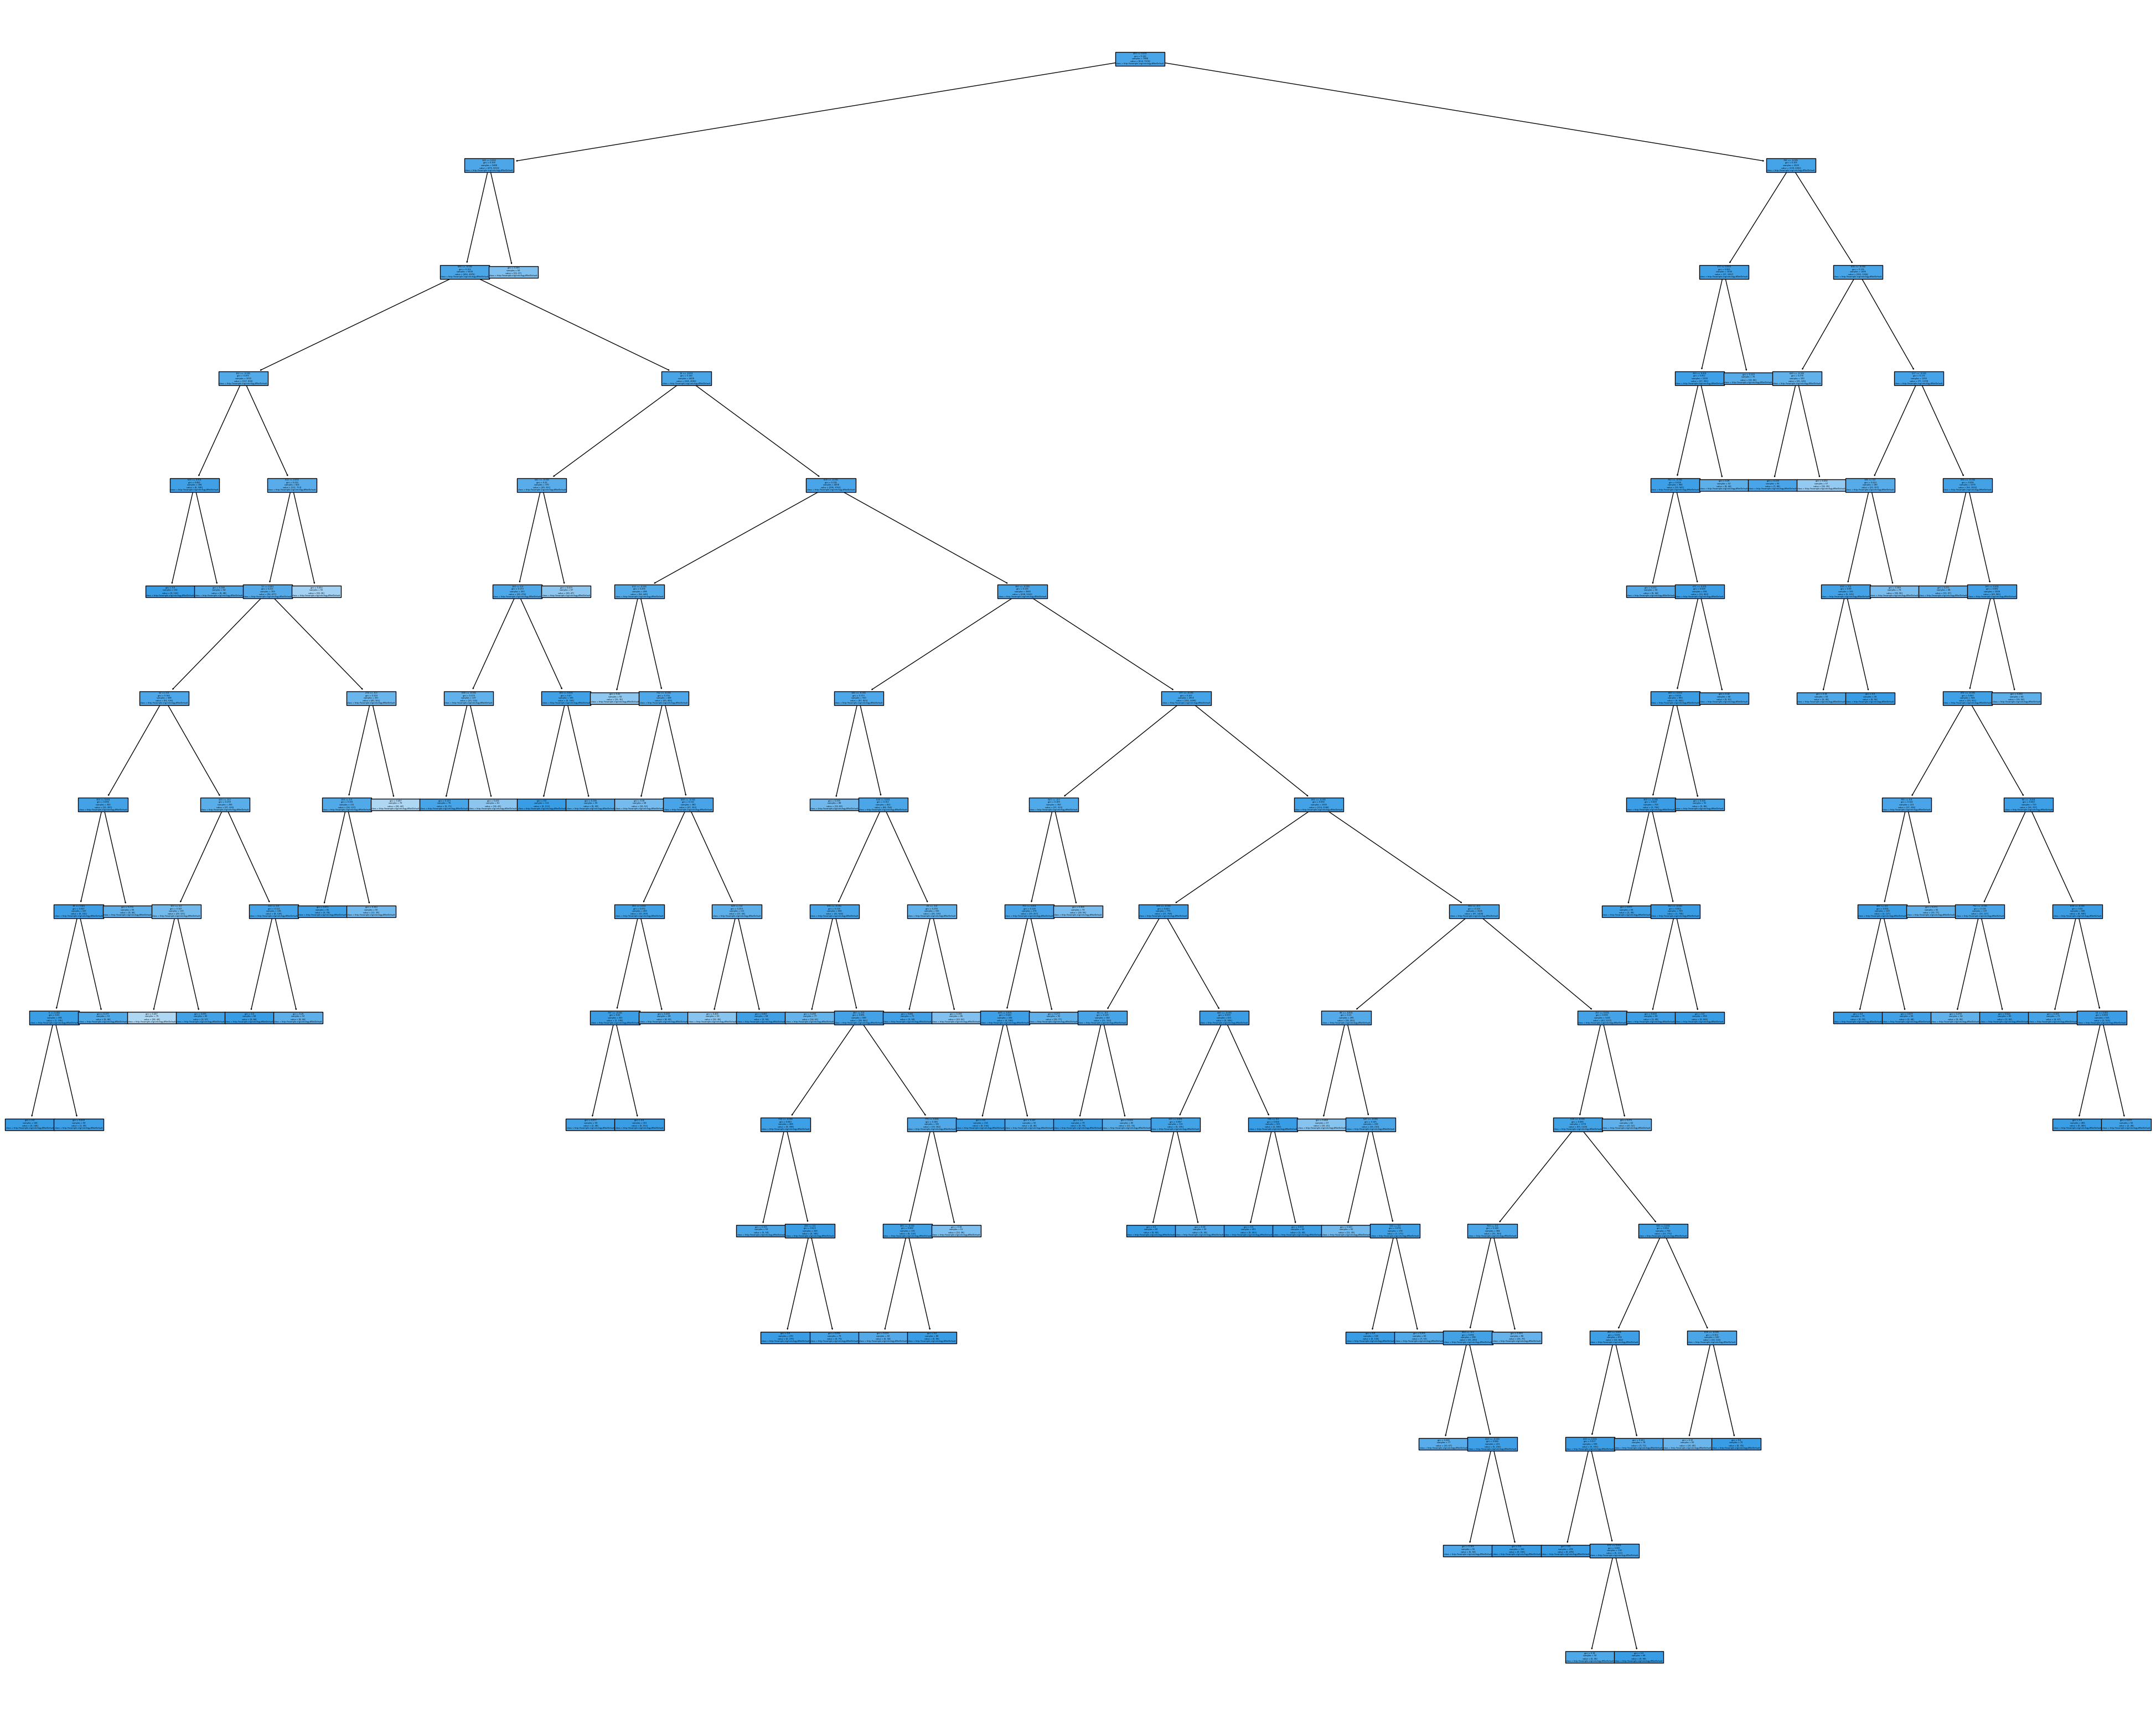

In [ ]:
#Plot DT
# Set up a figure for plotting the decision tree with specified dimensions
class_names = clf.classes_
fig, ax = plt.subplots(figsize=(50, 40))  # Increase the figure size

# Plot the decision tree with the following configurations:
# - feature_names: feature names for better visualization
# - class_names: unique classes present in the target labels
# - filled: whether to fill the decision tree nodes with color
tree.plot_tree(clf,
               feature_names=features,
               class_names=class_names, #fix this as current classes are flipped/wrong
               filled=True,
               ax=ax)

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Split the data into a training set and a test set
dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(dfX, dfY, test_size=0.2, random_state=42)

# Train the model on the training set
clf = clf.fit(dfX_train, dfY_train)

# Make predictions on the test set
dfY_pred = clf.predict(dfX_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(dfY_test, dfY_pred)
f1 = f1_score(dfY_test, dfY_pred, average='weighted')
precision = precision_score(dfY_test, dfY_pred, average='weighted')
recall = recall_score(dfY_test, dfY_pred, average='weighted')
conf_matrix = confusion_matrix(dfY_test, dfY_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.9355444305381727
F1 Score: 0.9043898633395202
Precision: 0.8752433815109939
Recall: 0.9355444305381727
Confusion Matrix:
 [[   0  103]
 [   0 1495]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


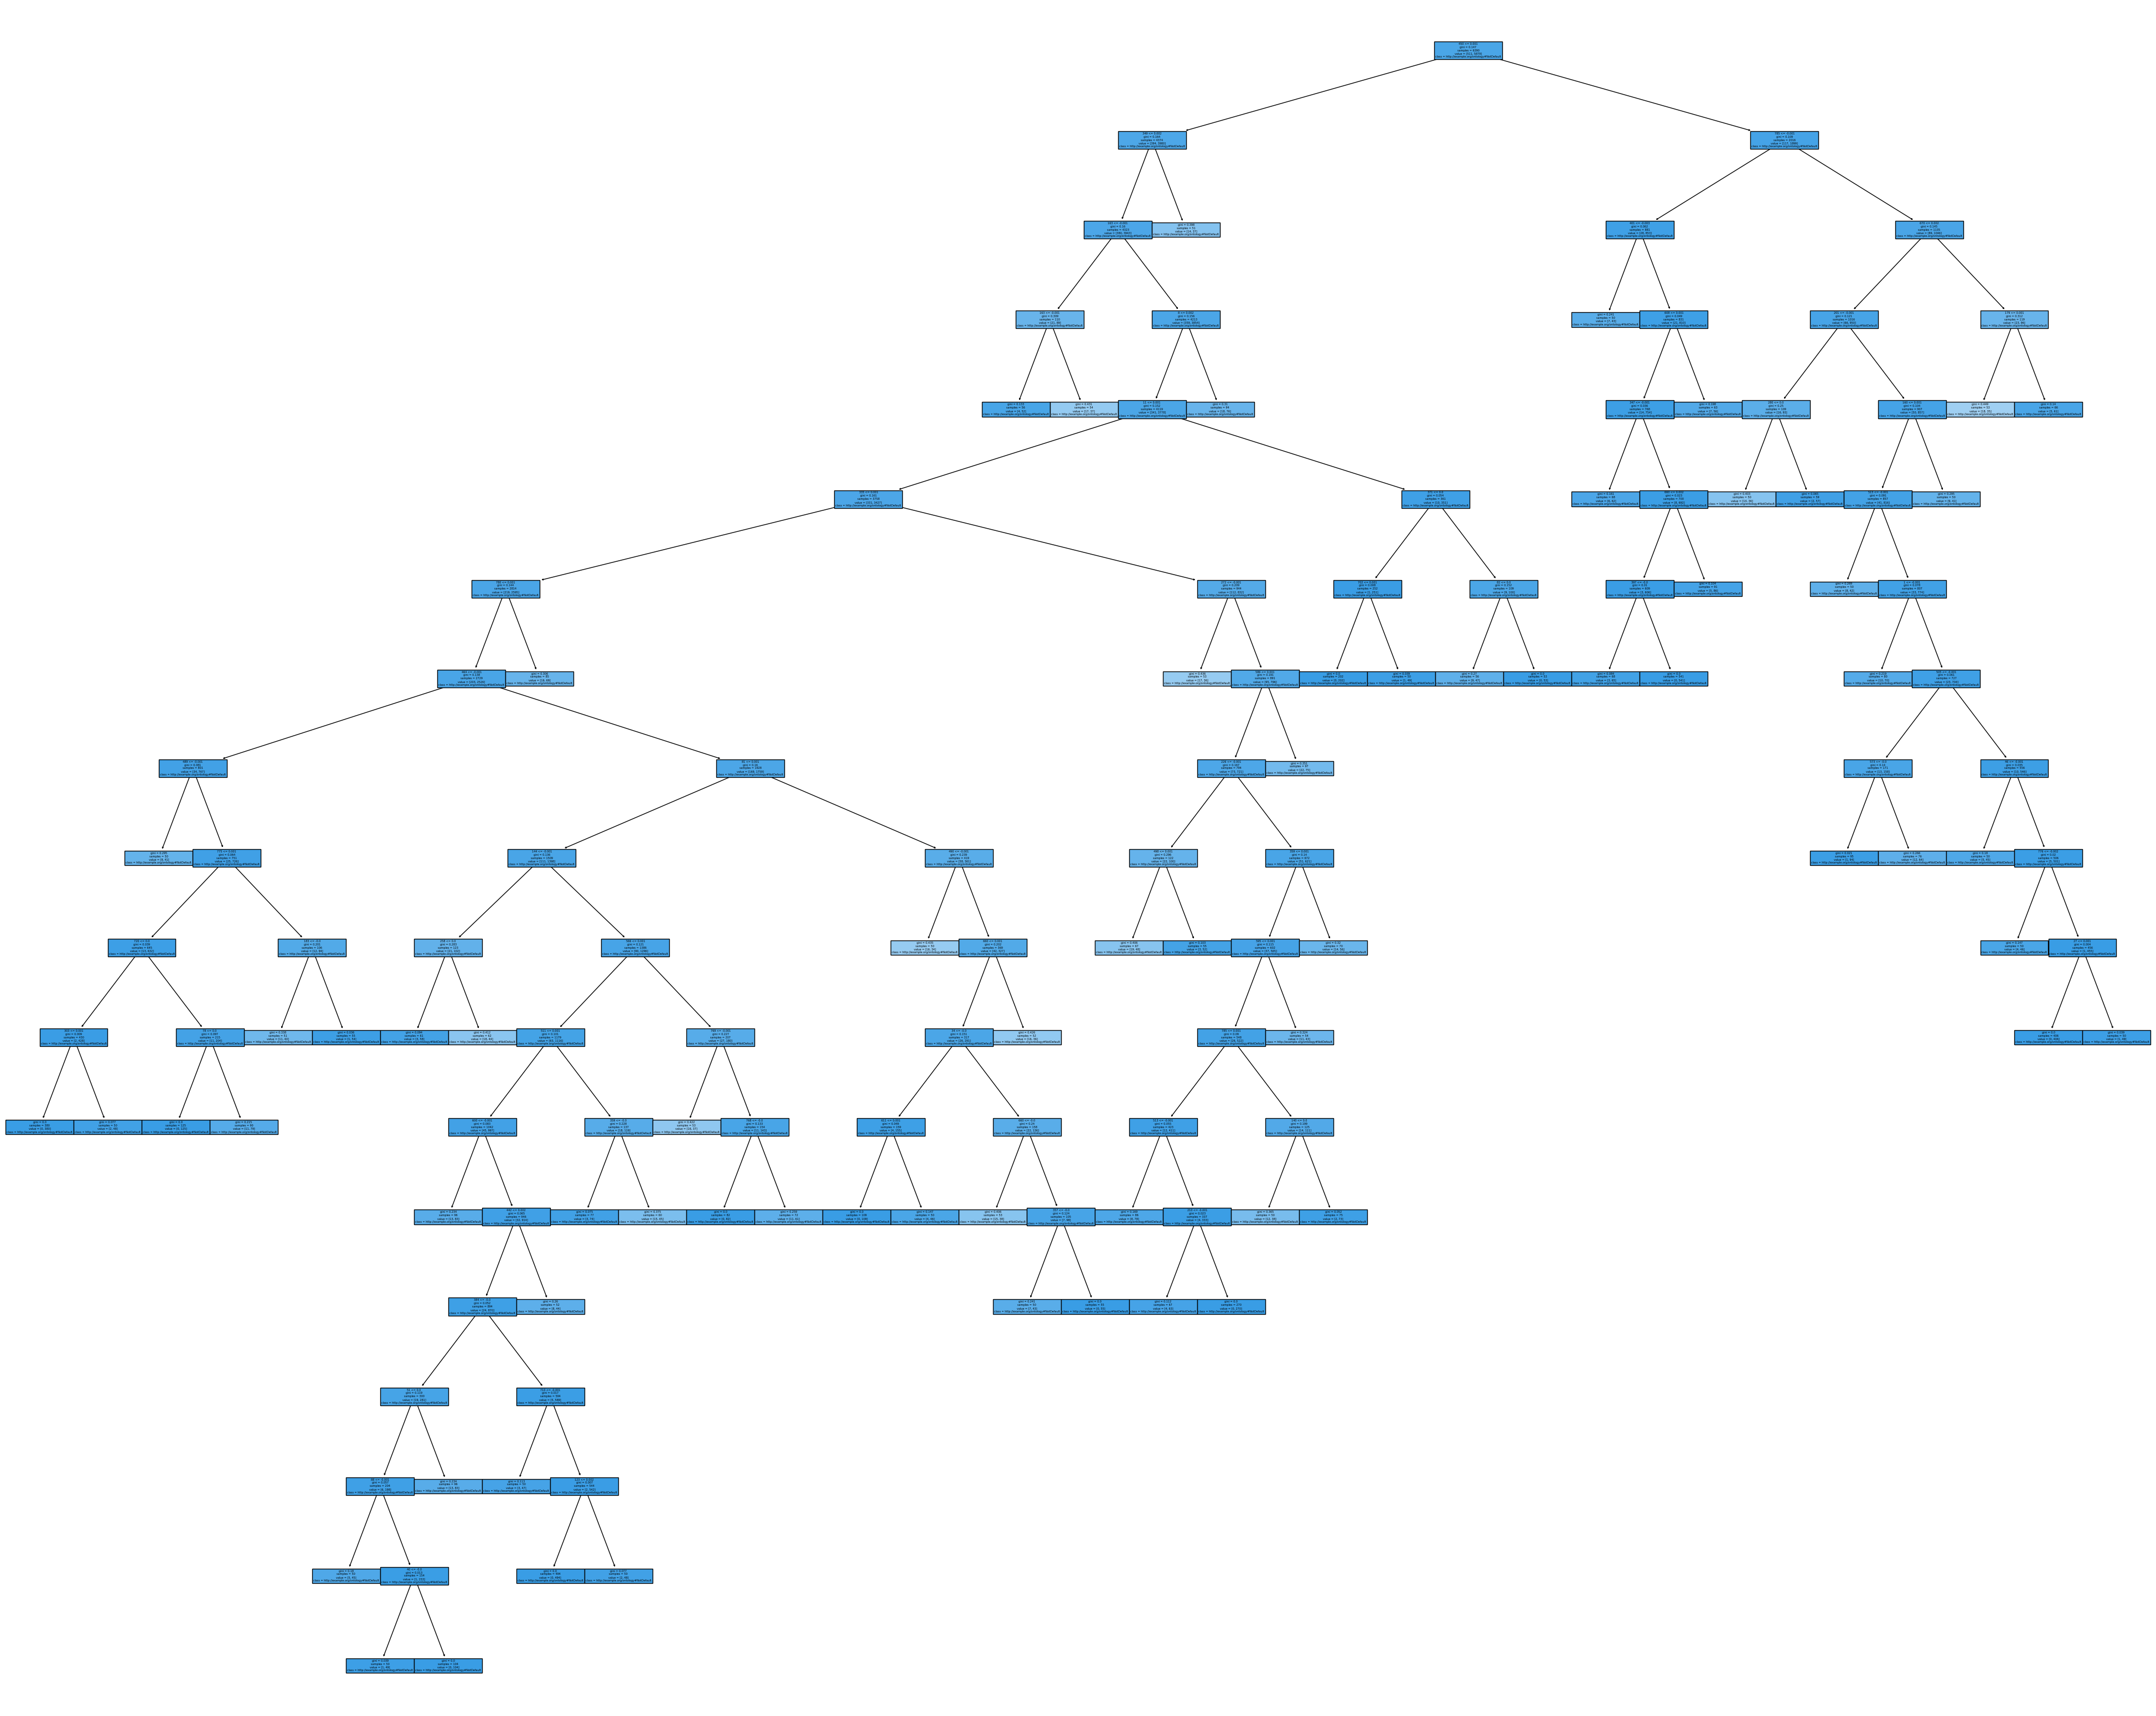

In [ ]:
#Plot DT
# Set up a figure for plotting the decision tree with specified dimensions
class_names = clf.classes_
fig, ax = plt.subplots(figsize=(50, 40))  # Increase the figure size

# Plot the decision tree with the following configurations:
# - feature_names: feature names for better visualization
# - class_names: unique classes present in the target labels
# - filled: whether to fill the decision tree nodes with color
tree.plot_tree(clf,
               feature_names=features,
               class_names=class_names, #fix this as current classes are flipped/wrong
               filled=True,
               ax=ax)

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

In [ ]:

# Save the figure as a high-resolution image
fig.savefig('decision_tree.png', dpi=300)  # Save the figure as a high-resolution PNG image

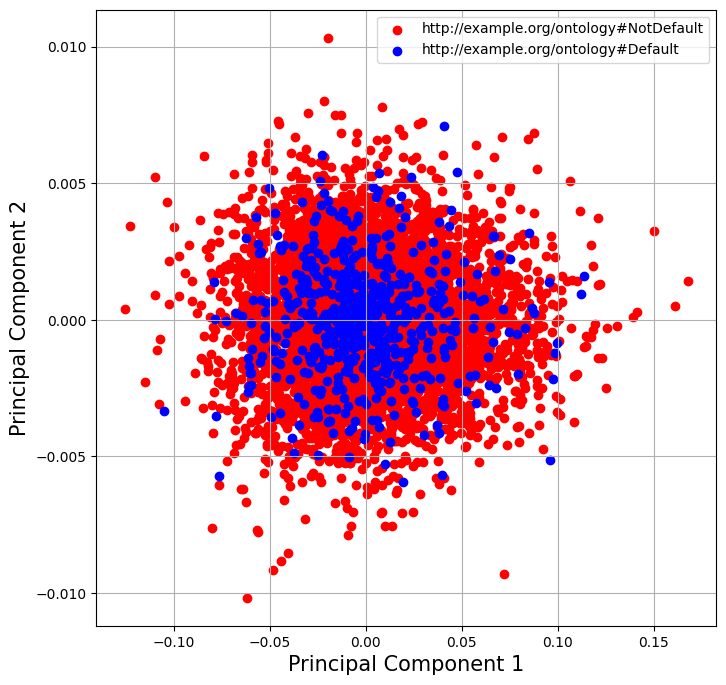

In [ ]:
from sklearn.decomposition import PCA


# Create a PCA (Principal Component Analysis) object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model and transform the input features (dfX) to obtain principal components
pca_result = pca.fit_transform(dfX)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])


# Concatenate the principal components with the target labels (dfY) into a single DataFrame
finalDf = pd.concat([principalDf, dfY], axis = 1)

# Set up a figure for plotting with specified dimensions
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

# Set labels for the x and y axes
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)


# Define target genres and corresponding colors for plotting
targets = ['http://example.org/ontology#NotDefault','http://example.org/ontology#Default']
colors = ['r', 'b']


# Scatter plot the principal components with different colors for each genre
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ClassifiedAs'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()